In [54]:
import os
os.chdir('/home/hugo-dev/esirem-dev/4a/kmutt/kmutt_v2')

In [55]:
import numpy as np
import plotly.express as px
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from utils.load_data import load_data_with_mapping

In [56]:
DATA_PATH = "./data/data_25ms_h=50%_16mfcc_RMT-DPR+HRK.json"

In [57]:
X, y, mapping = load_data_with_mapping(DATA_PATH)

print(X.shape)
print(y.shape)

Training sets loaded!
(560121, 1, 16)
(560121,)


In [58]:
# plot Total Segments for each class
def plot_segments(y, mapping):
    plt.figure(figsize=(10, 5))
    values, counts = np.unique(y, return_counts=True)
    print(values, counts)
    plt.bar([mapping[val] for val in values], counts)
    plt.xlabel('Classes')
    plt.ylabel('Total Segments')
    plt.title('Total Segments for each class')

[0 1] [162460 397661]


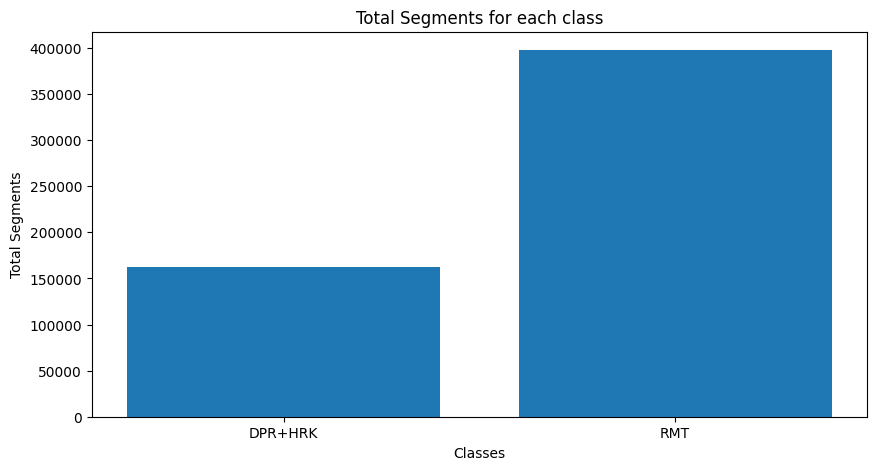

In [59]:
plot_segments(y, mapping)

In [60]:
def calculate_f_ratios(mfcc_data, labels):
    f_ratios = []
    n_mfcc = mfcc_data.shape[2]  # 16 MFCCs
    
    for i in range(n_mfcc):
        class_data = [mfcc_data[labels == label, 0, i] for label in np.unique(labels)]
        
        f_val, p_val = f_oneway(*class_data)
        f_ratios.append(f_val)
    
    return f_ratios

In [61]:
def get_top_3_coefficients(f_ratios):
    return np.argsort(f_ratios)[-3:]

In [62]:
def plot_3d_interactive(mfcc_data, labels, top_3_indices, label_mapping):
    x = mfcc_data[:, 0, top_3_indices[0]]
    y = mfcc_data[:, 0, top_3_indices[1]]
    z = mfcc_data[:, 0, top_3_indices[2]]
    
    labels = [label_mapping[label] for label in labels]

    df = pd.DataFrame({
        f'MFCC {top_3_indices[0] + 1}': x,
        f'MFCC {top_3_indices[1] + 1}': y,
        f'MFCC {top_3_indices[2] + 1}': z,
        'Class': labels
    })
    
    fig = px.scatter_3d(df, 
                        x=f'MFCC {top_3_indices[0] + 1}', 
                        y=f'MFCC {top_3_indices[1] + 1}', 
                        z=f'MFCC {top_3_indices[2] + 1}', 
                        color='Class', 
                        title='3D Scatter Plot of Top 3 MFCC Coefficients')
    
    fig.write_html("top3-MFCC_plot.html")
    print("DONE")

In [63]:
f_ratios = calculate_f_ratios(X, y)
print(f_ratios)

[70648.32098590024, 33521.907500271125, 7944.583825549409, 142.15662784752143, 31061.936442874074, 470.61220026847786, 1072.137752315483, 94.70503900930933, 2765.868060641007, 22675.436708684752, 603.4514679683358, 15128.773251906618, 3453.4703083458458, 12200.498827187886, 8544.98992717702, 3595.762077468824]


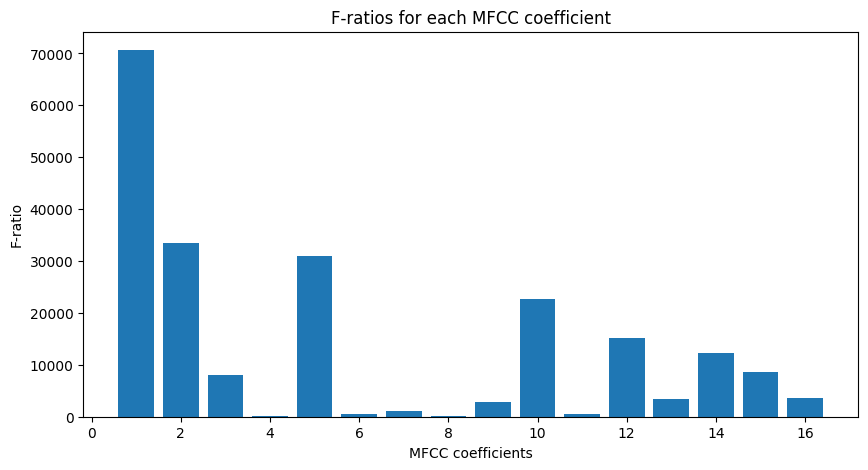

In [64]:
# draw the F-ratios
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(1, 17), f_ratios)
plt.xlabel("MFCC coefficients")
plt.ylabel("F-ratio")
plt.title("F-ratios for each MFCC coefficient")
plt.show()

In [65]:
# rank the F-ratios
sorted_indices = np.argsort(f_ratios)[::-1] + 1
print(sorted_indices)

[ 1  2  5 10 12 14 15  3 16 13  9  7 11  6  4  8]


In [66]:
top_3_indices = get_top_3_coefficients(f_ratios)

# only keep the first 1000 samples for each class to speed up the computation
X = np.concatenate([X[y == label][:1000] for label in np.unique(y)], axis=0)
y = np.concatenate([np.full(1000, label) for label in np.unique(y)], axis=0)

# plot_3d_interactive(X, y, top_3_indices, mapping)